In [14]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType, TimestampType, StringType
from pyspark.sql.window import Window
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.utils import AnalysisException
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib
from matplotlib.animation import FuncAnimation, PillowWriter
import math

In [2]:
# spark initialization
spark = SparkSession.builder.appName("gamedata").getOrCreate()
# load master database
hard_sales = spark.read.parquet("../database/parquet/hard_sales")

23/04/02 13:52:49 WARN Utils: Your hostname, apricot.local resolves to a loopback address: 127.0.0.1; using 192.168.0.42 instead (on interface en0)
23/04/02 13:52:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/02 13:52:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/04/02 13:52:49 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
def plot_pie_chart_by_year(df, year):
    # 与えられた年のデータをフィルタリング
    yearly_data = df.filter(df["year"] == year)

    # 各メーカーの年間販売台数を集計
    maker_sales = yearly_data.groupBy("maker").agg(F.sum("units").alias("yearly_units"))

    # DataFrameをPandasのDataFrameに変換
    maker_sales_pd = maker_sales.toPandas()

    # メーカーごとの色を定義
    colors = {
        'Nintendo': 'red',
        'SONY': 'blue',
        'Microsoft': 'green'
    }

    # メーカー名に応じた色をリストに追加
    color_list = [colors[maker] for maker in maker_sales_pd['maker']]
    print(color_list)

    # 与えられた年のメーカー別シェアの円グラフを描画
    plt.figure(figsize=(8, 8))
    plt.pie(maker_sales_pd['yearly_units'], labels=maker_sales_pd['maker'], autopct='%1.1f%%', colors=color_list)
    plt.title(f'Maker Share in {year}')
    plt.show()

['red', 'green', 'blue']


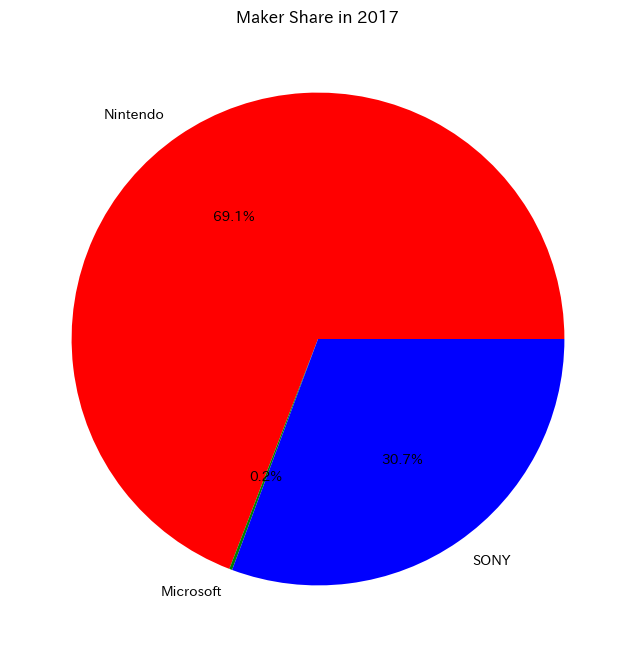

['red', 'green', 'blue']


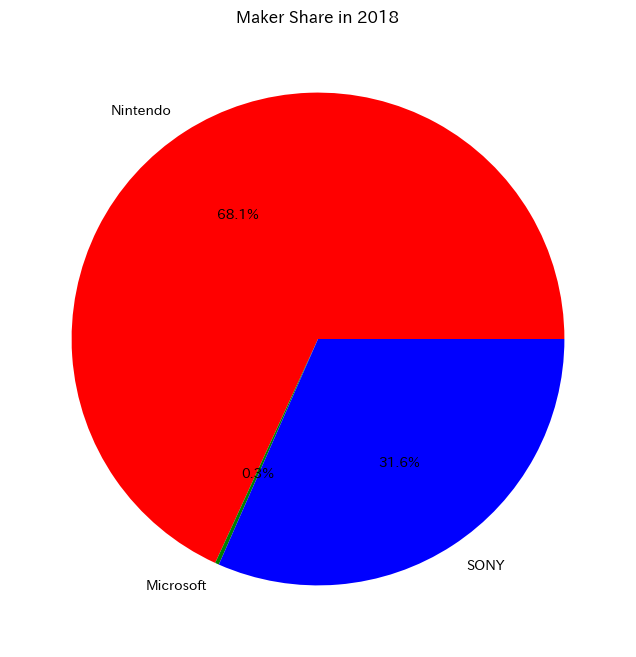

['red', 'green', 'blue']


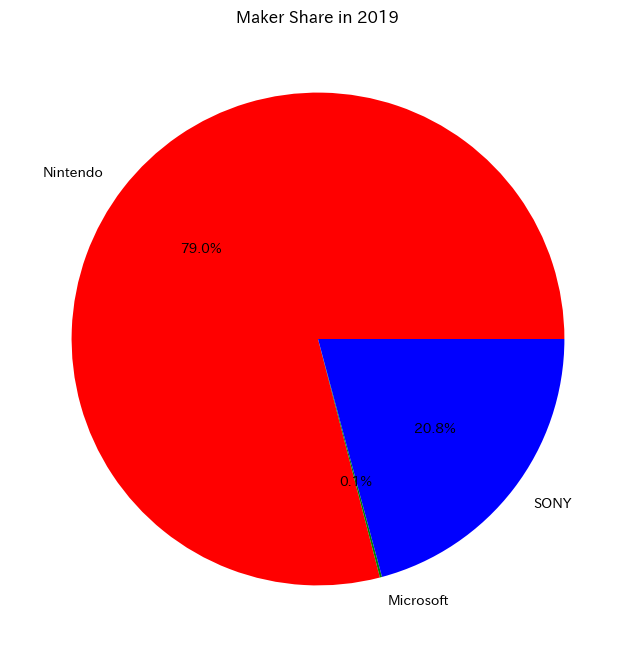

['red', 'green', 'blue']


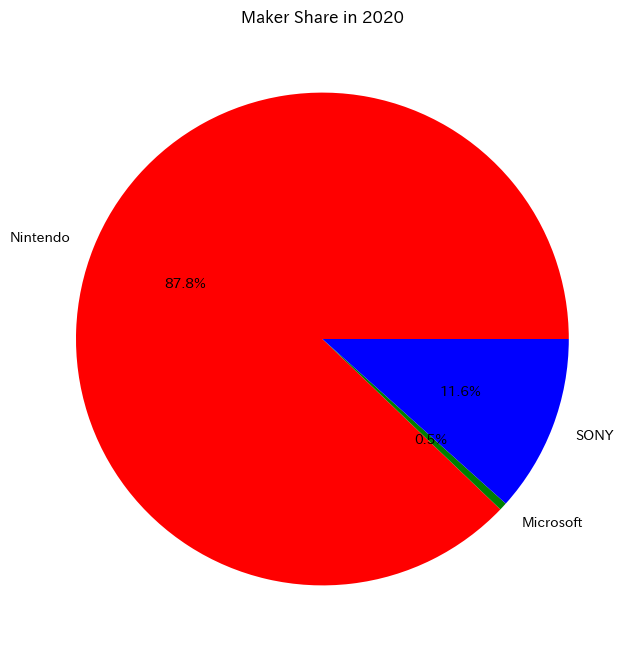

['red', 'green', 'blue']


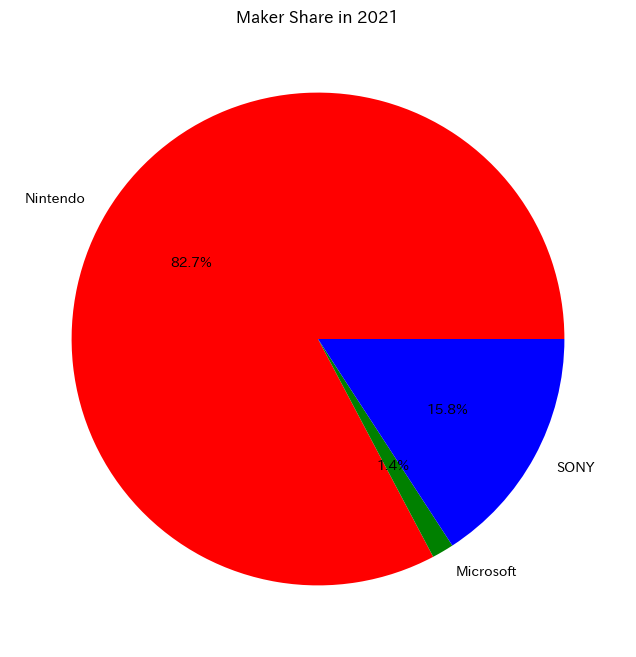

['red', 'green', 'blue']


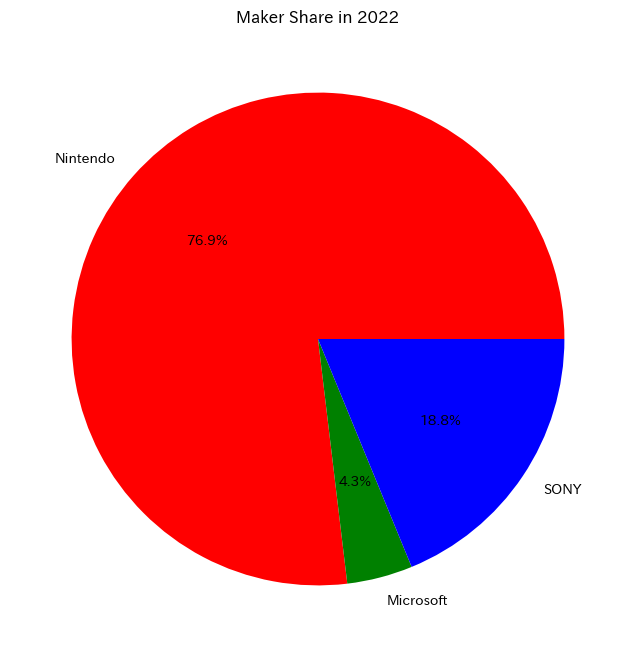

['red', 'green', 'blue']


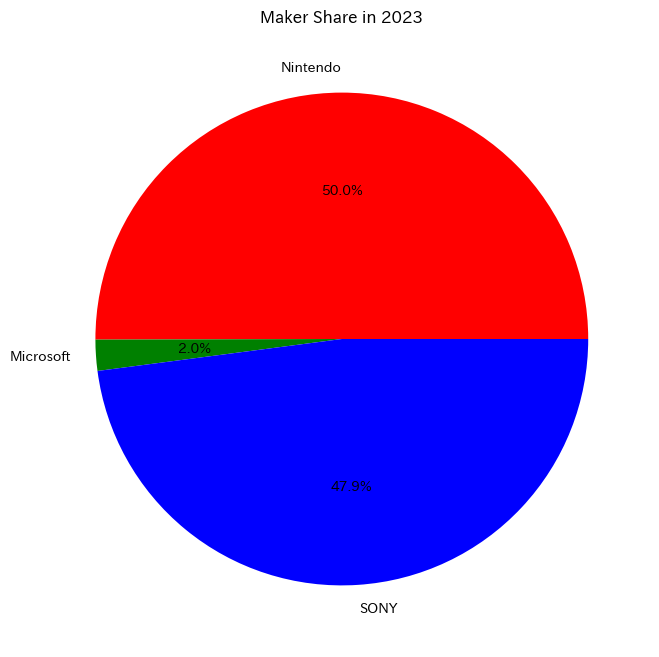

In [5]:
# 関数を使って、2017年から2022年までの各年のメーカー別シェアを表示
for year in range(2017, 2024):
    plot_pie_chart_by_year(hard_sales, year)


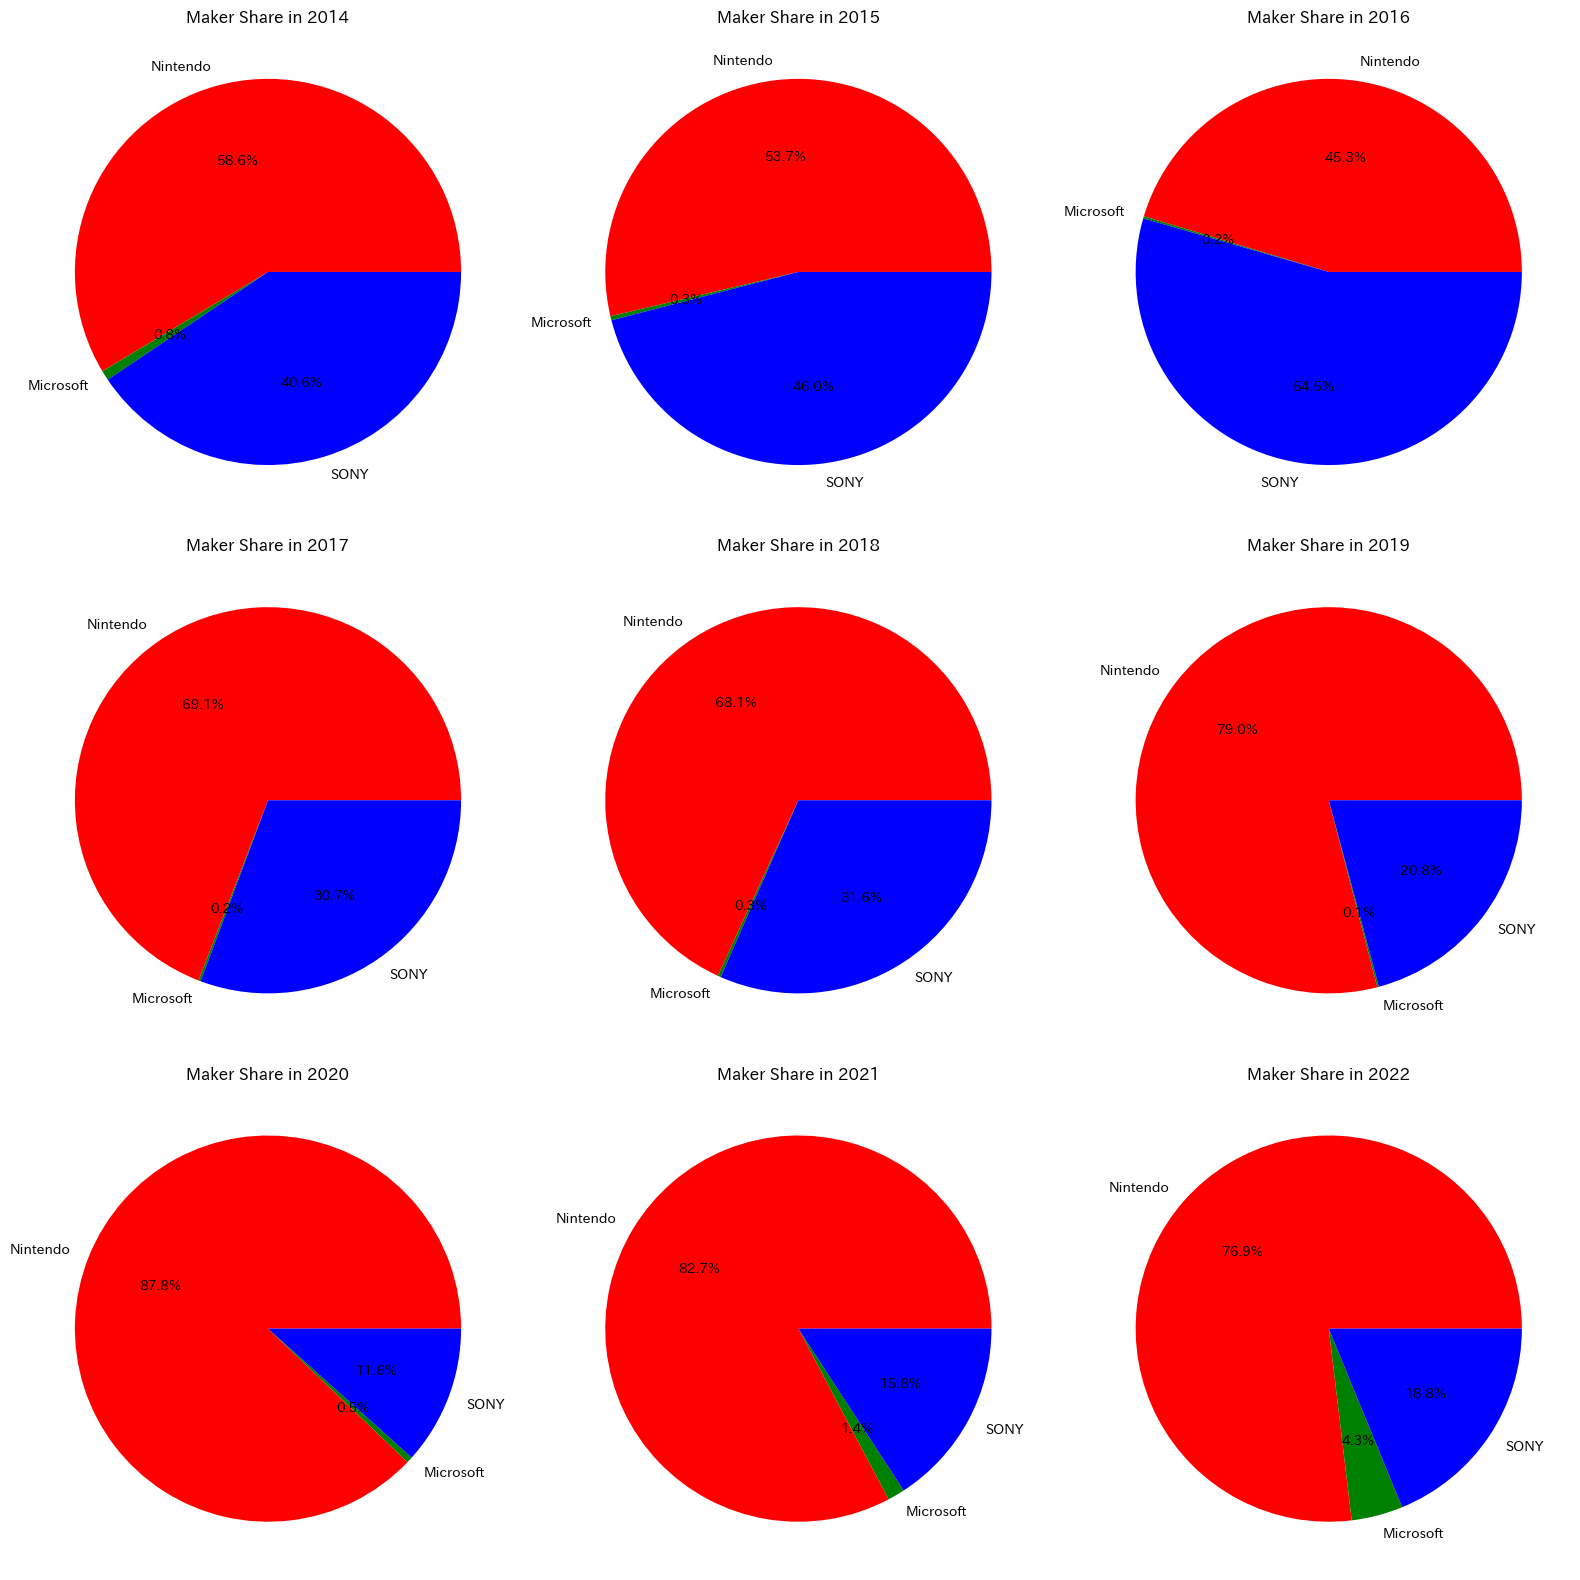

In [18]:
def plot_pie_chart_by_year(df, year, ax):
    yearly_data = df.filter(df["year"] == year)
    maker_sales = yearly_data.groupBy("maker").agg(F.sum("units").alias("yearly_units"))
    maker_sales_pd = maker_sales.toPandas()

    colors = {
        'Nintendo': 'red',
        'SONY': 'blue',
        'Microsoft': 'green'
    }

    color_list = [colors[maker] for maker in maker_sales_pd['maker']]

    ax.pie(maker_sales_pd['yearly_units'], labels=maker_sales_pd['maker'], autopct='%1.1f%%', colors=color_list)
    ax.set_title(f'Maker Share in {year}')

# 各年のメーカー別シェアを表示するためのグリッドを作成
years = list(range(2014, 2023))
n_years = len(years)
n_cols = 3
n_rows = math.ceil(n_years / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))
axes = axes.flatten()

# 各年のメーカー別シェアをサブプロットに描画
for i, year in enumerate(years):
    plot_pie_chart_by_year(hard_sales, year, axes[i])

# 余分なサブプロットを削除
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [8]:
hard_sales.show()

+-------+----------+----------+------+----+-----+----------+--------+-------------+-----------+---------+----------+----------+---------+----+
|     hw|begin_date|  end_date| units|year|month|launch_day|   maker|    full_name|launch_year|delta_day|delta_week|delta_year|sum_units|week|
+-------+----------+----------+------+----+-----+----------+--------+-------------+-----------+---------+----------+----------+---------+----+
|     GB|1998-10-12|1998-10-18| 10867|1998|   10|1989-04-21|Nintendo|     GAME BOY|       1989|     3467|       495|         9|    10867|  42|
|    N64|1998-10-12|1998-10-18|  2965|1998|   10|1996-06-23|Nintendo|   NINTENDO64|       1996|      847|       121|         2|     2965|  42|
|     PS|1998-10-12|1998-10-18| 20918|1998|   10|1994-12-03|    SONY|  PlayStation|       1994|     1415|       202|         4|    20918|  42|
| SATURN|1998-10-12|1998-10-18|   858|1998|   10|1994-11-22|    SEGA|  SEGA SATURN|       1994|     1426|       203|         4|      858|  42|

2018
             units
maker             
Nintendo   4048808
Microsoft    15339
SONY       1876955
[<matplotlib.patches.Wedge object at 0x127b83220>, <matplotlib.patches.Wedge object at 0x127b814b0>, <matplotlib.patches.Wedge object at 0x127b80be0>]
[Text(-0.5937536380095146, 0.9259895341473717, 'Nintendo'), Text(-0.450888725238363, -1.0033440872666386, 'Microsoft'), Text(0.6012448485429207, -0.9211431116284812, 'SONY')]
[Text(-0.3238656207324625, 0.5050852004440208, '68.1%'), Text(-0.2459393046754707, -0.5472785930545301, '0.3%'), Text(0.3279517355688658, -0.5024416972518988, '31.6%')]


IndexError: list index out of range

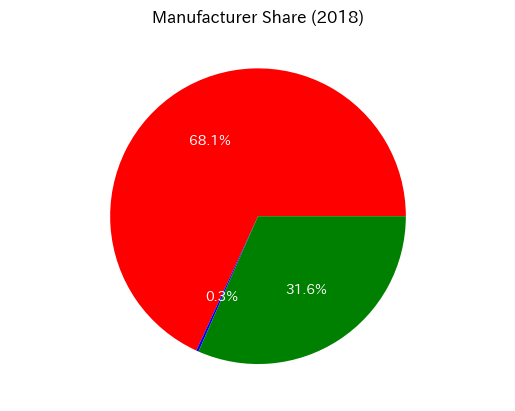

In [13]:
def init_pie_chart(ax):
    ax.clear()
    ax.axis('equal')
    ax.set_title("Manufacturer Share")
    return []

def update_pie_chart(year, df, ax):
    ax.clear()
    ax.axis('equal')
    ax.set_title(f"Manufacturer Share ({year})")

    year_data = df.filter(F.col("year") == year).groupBy("maker").agg(F.sum("units").alias("units"))
    year_data_pd = year_data.toPandas().set_index("maker")
    print(year)
    print(year_data_pd)
    wedges, texts, autotexts = ax.pie(year_data_pd["units"], labels=year_data_pd.index,
                                      autopct="%1.1f%%", colors=["red", "blue", "green"],
                                      textprops=dict(color="w"))
    print(wedges)
    print(texts)
    print(autotexts)
    return wedges, texts, autotexts

def create_animated_pie_chart(df, years, interval=1000, save_path="animated_pie_chart.gif"):
    fig, ax = plt.subplots()
    ani = FuncAnimation(fig, update_pie_chart, frames=years, fargs=(df, ax), init_func=lambda: init_pie_chart(ax), interval=interval, blit=True)
    
    writer = PillowWriter(fps=1)
    ani.save(save_path, writer=writer)
    print(f"アニメーションが {save_path} に保存されました。")

years = list(range(2018, 2023))
create_animated_pie_chart(hard_sales, years)


AttributeError: 'FuncAnimation' object has no attribute '_frames'

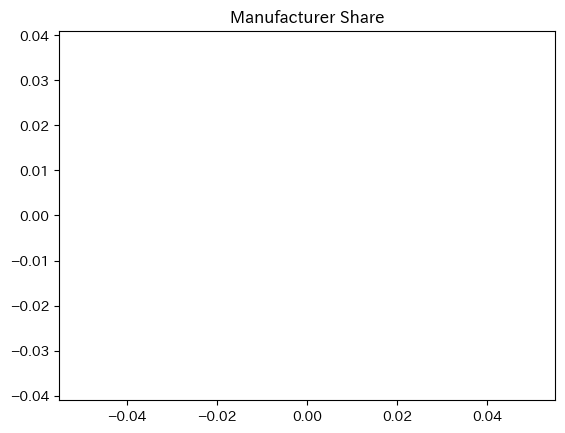

In [7]:
def init_pie_chart(ax):
    ax.clear()
    ax.axis('equal')
    ax.set_title("Manufacturer Share")
    return []

def update_pie_chart(year, df, ax):
    ax.clear()
    ax.axis('equal')
    ax.set_title(f"Manufacturer Share ({year})")
    print(f"Target is {year}")
    year_data = df.filter(F.col("year") == year).groupBy("maker").agg(F.sum("units").alias("units"))
    year_data_pd = year_data.toPandas().set_index("maker")
    print(year_data_pd)
    
    if not year_data_pd.empty:
        wedges, texts, autotexts = ax.pie(year_data_pd["units"], labels=year_data_pd.index,
                                          autopct="%1.1f%%", colors=["red", "blue", "green"],
                                          textprops=dict(color="w"))
    else:
        wedges, texts, autotexts = [], [], []
    
    return wedges, texts, autotexts

def create_animated_pie_chart(df, years, interval=1000, save_path="animated_pie_chart.gif"):
    fig, ax = plt.subplots()
    ani = FuncAnimation(fig, update_pie_chart, frames=years, fargs=(df, ax), init_func=lambda: init_pie_chart(ax), interval=interval, blit=True)
    
    if len(ani._frames) > 0:
        writer = PillowWriter(fps=1)
        ani.save(save_path, writer=writer)
        print(f"アニメーションが {save_path} に保存されました。")
    else:
        print("アニメーションを作成できませんでした。データが不足しています。")

years = list(range(2017, 2023))
create_animated_pie_chart(hard_sales, years)


IndexError: list index out of range

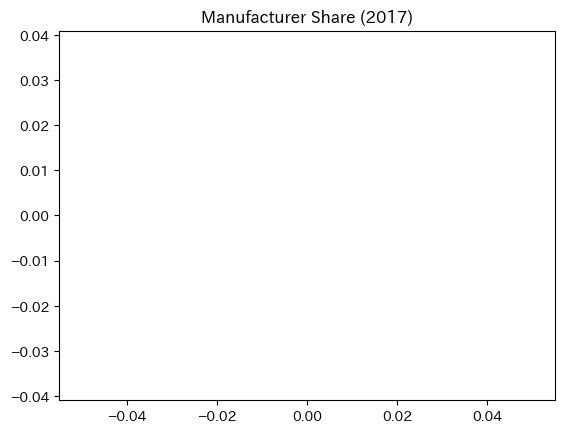

In [26]:
years = list(range(2017, 2023))
create_animated_pie_chart(hard_sales, years)